In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons, make_blobs
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

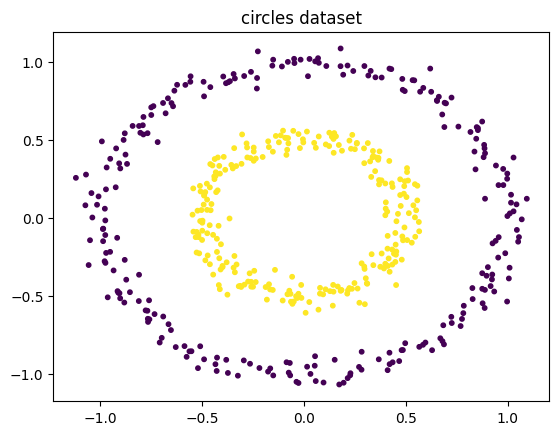

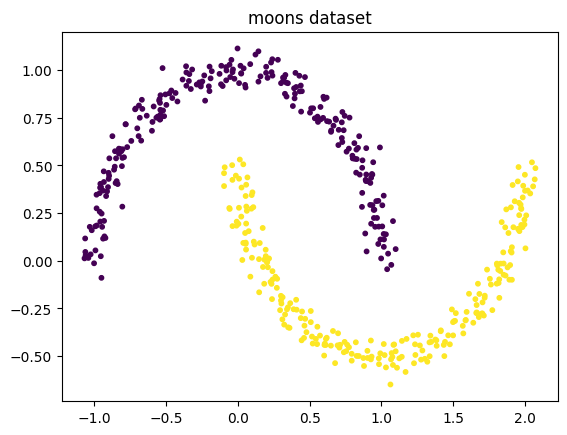

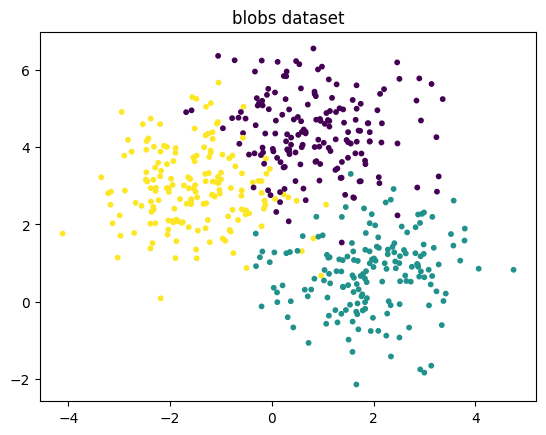

In [2]:
# 生成数据集
datasets = {
    "circles": make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=0),
    "moons": make_moons(n_samples=500, noise=0.05, random_state=0),
    "blobs": make_blobs(n_samples=500, centers=3, random_state=0, cluster_std=1.0)
}

# 可视化真实簇结构
for name, (X, y) in datasets.items():
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=10)
    plt.title(f"{name} dataset")
    plt.show()

In [3]:
# 已知簇数量时的聚类分析
for name, (X, y) in datasets.items():
    print(f"\n{name.upper()} Dataset Analysis:")
    n_clusters = len(np.unique(y))  # 真实簇数量

    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    kmeans_labels = kmeans.labels_
    print("KMeans: ARI =", adjusted_rand_score(y, kmeans_labels))

    # AGNES
    agnes = AgglomerativeClustering(n_clusters=n_clusters).fit(X)
    agnes_labels = agnes.labels_
    print("AGNES: ARI =", adjusted_rand_score(y, agnes_labels))

    # DBSCAN
    dbscan = DBSCAN(eps=0.2, min_samples=5).fit(X)
    dbscan_labels = dbscan.labels_
    print("DBSCAN: ARI =", adjusted_rand_score(y, dbscan_labels))


CIRCLES Dataset Analysis:
KMeans: ARI = -0.0020079033564140264
AGNES: ARI = 0.001653115537760033
DBSCAN: ARI = 1.0

MOONS Dataset Analysis:
KMeans: ARI = 0.26893493975903615
AGNES: ARI = 0.2989622559043587
DBSCAN: ARI = 1.0

BLOBS Dataset Analysis:
KMeans: ARI = 0.8129244155387336
AGNES: ARI = 0.6602205640012495
DBSCAN: ARI = 0.011351392289377767


In [4]:
# 不同参数的测试分析（使用轮廓系数）
for name, (X, _) in datasets.items():
    print(f"\n{name.upper()} Dataset Silhouette Analysis:")
    n_clusters_range = range(2, 10)  # 测试的簇数量范围

    # KMeans
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
        score = silhouette_score(X, kmeans.labels_)
        print(f"KMeans (k={n_clusters}): Silhouette Score = {score:.2f}")

    # AGNES
    for n_clusters in n_clusters_range:
        agnes = AgglomerativeClustering(n_clusters=n_clusters).fit(X)
        score = silhouette_score(X, agnes.labels_)
        print(f"AGNES (k={n_clusters}): Silhouette Score = {score:.2f}")

    # DBSCAN (varying eps)
    for eps in np.linspace(0.1, 0.5, 5):
        dbscan = DBSCAN(eps=eps, min_samples=5).fit(X)
        if len(np.unique(dbscan.labels_)) > 1:  # 至少有两个簇
            score = silhouette_score(X, dbscan.labels_)
            print(f"DBSCAN (eps={eps:.2f}): Silhouette Score = {score:.2f}")



CIRCLES Dataset Silhouette Analysis:
KMeans (k=2): Silhouette Score = 0.35
KMeans (k=3): Silhouette Score = 0.39
KMeans (k=4): Silhouette Score = 0.37
KMeans (k=5): Silhouette Score = 0.36
KMeans (k=6): Silhouette Score = 0.33
KMeans (k=7): Silhouette Score = 0.33
KMeans (k=8): Silhouette Score = 0.38
KMeans (k=9): Silhouette Score = 0.40
AGNES (k=2): Silhouette Score = 0.34
AGNES (k=3): Silhouette Score = 0.36
AGNES (k=4): Silhouette Score = 0.35
AGNES (k=5): Silhouette Score = 0.34
AGNES (k=6): Silhouette Score = 0.31
AGNES (k=7): Silhouette Score = 0.30
AGNES (k=8): Silhouette Score = 0.32
AGNES (k=9): Silhouette Score = 0.35
DBSCAN (eps=0.10): Silhouette Score = 0.15
DBSCAN (eps=0.20): Silhouette Score = 0.11

MOONS Dataset Silhouette Analysis:
KMeans (k=2): Silhouette Score = 0.49
KMeans (k=3): Silhouette Score = 0.43
KMeans (k=4): Silhouette Score = 0.46
KMeans (k=5): Silhouette Score = 0.49
KMeans (k=6): Silhouette Score = 0.51
KMeans (k=7): Silhouette Score = 0.52
KMeans (k=8)